In [1]:
# species name of fish

# weight of fish in Gram g

# vertical length in cm

# diagonal length in cm

# cross length in cm

# height in cm

# diagonal width in cm


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [34]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [35]:
df.shape

(159, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [37]:
df.rename(columns={'Length1' : 'vertical length', 'Length2' : 'diagonal length', 'Length3' : 'cross length',
                   'Width':'diagonal Width'},inplace=1)

In [38]:
df.head()

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
df.describe()

,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [40]:
x = df['Species'].value_counts()
x

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species'>

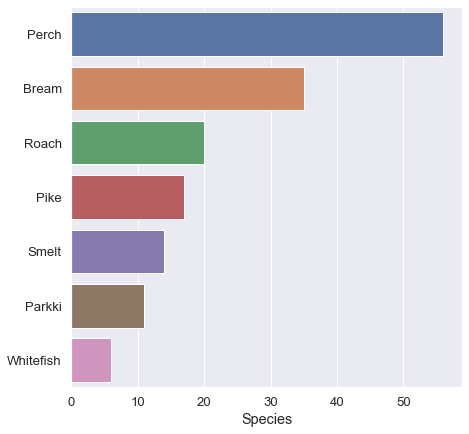

In [41]:
sns.barplot(x=x, y=x.index) # sns.countplot(df['Species'])   or  df['Species'].value_counts().plot.bar()

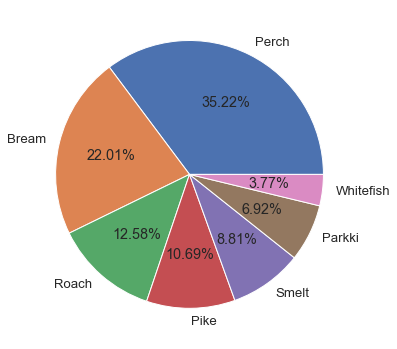

In [42]:
plt.figure(figsize=(6, 8))
plt.pie(x, labels = x.index, autopct='%1.2f%%')
plt.show()

# Get Distribution of Columns

In [43]:
num_col = df._get_numeric_data()
num_col

,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


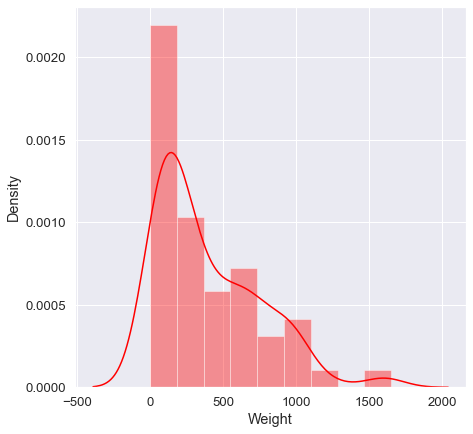

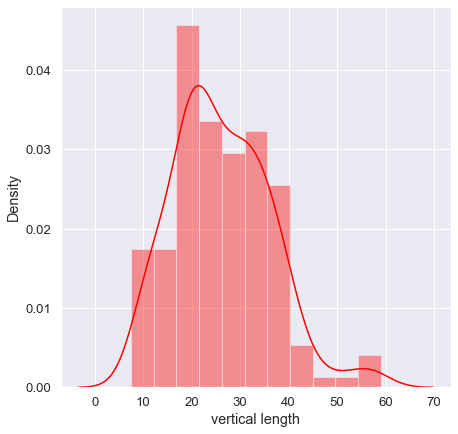

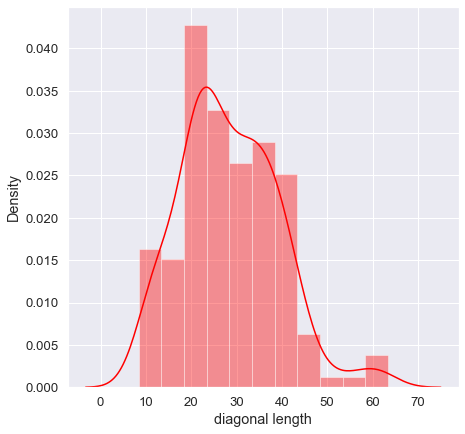

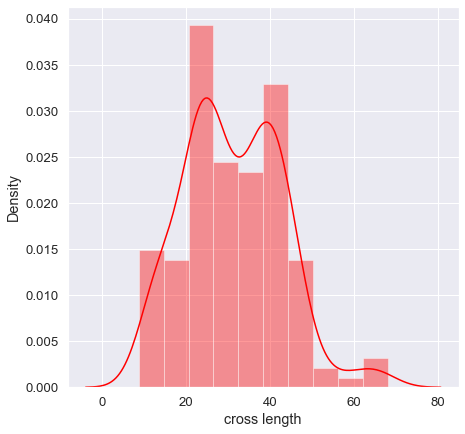

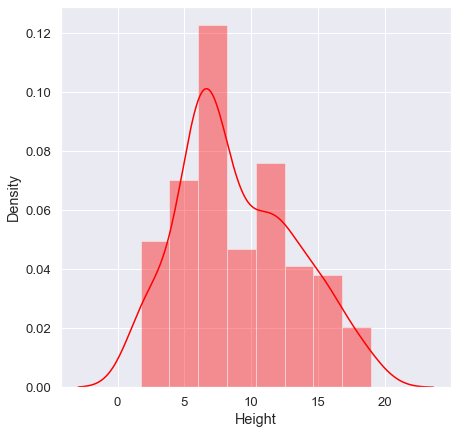

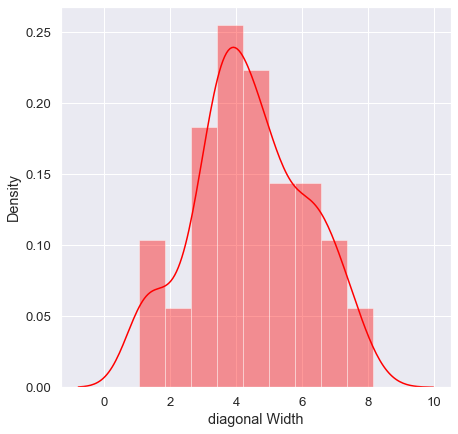

In [44]:
for col in num_col:
    sns.distplot(df[col], color='red')
    plt.show()

# Detect Outliers 

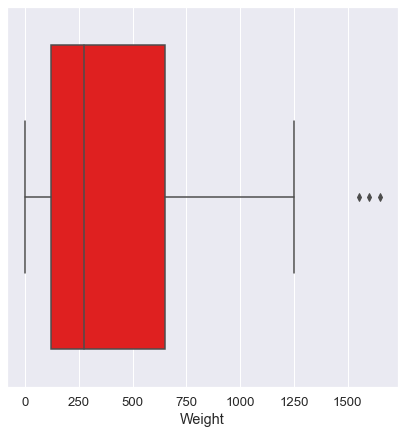

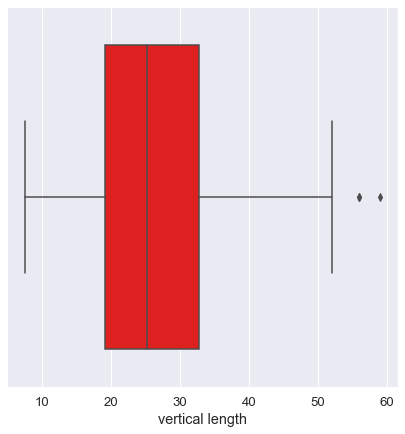

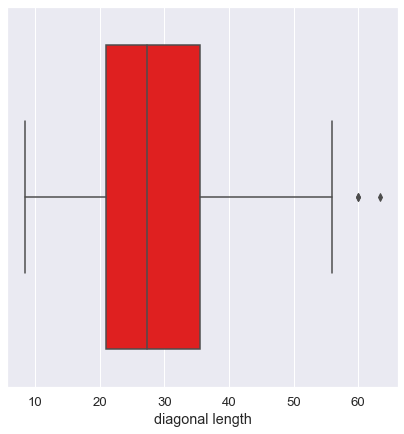

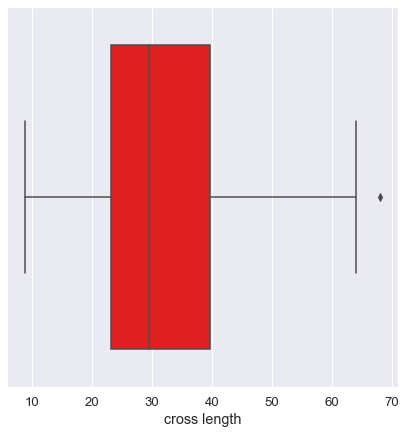

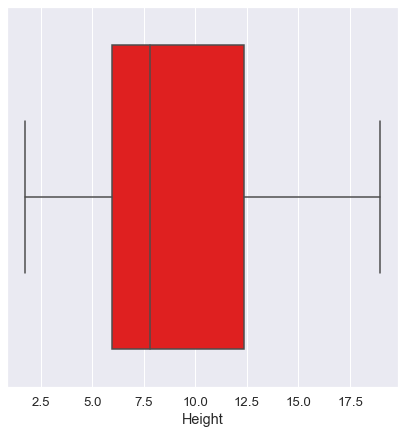

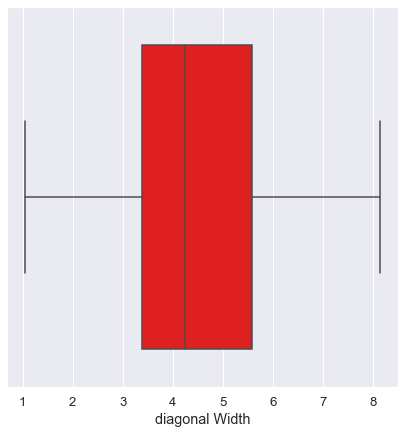

In [45]:
for col in num_col:
    sns.boxplot(df[col], color='red')
    plt.show()

In [46]:
df[df['Weight']>1500]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [47]:
df[df['Weight']==0]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [48]:
df[df['Weight']>0]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [49]:
df['Weight'].describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

In [50]:
df[df['Weight']>0]['Weight'].mean()

400.84746835443036

In [51]:
df[df['Weight']>0]['Weight'].median()

281.5

In [52]:
df['Weight'] = df['Weight'].apply(lambda x: df[df['Weight']>0]['Weight'].median() if x <= 0 else x)

In [53]:
df.loc[40]

Species             Roach
Weight              281.5
vertical length      19.0
diagonal length      20.5
cross length         22.8
Height             6.4752
diagonal Width     3.3516
Name: 40, dtype: object

# Get Correlation

<AxesSubplot:>

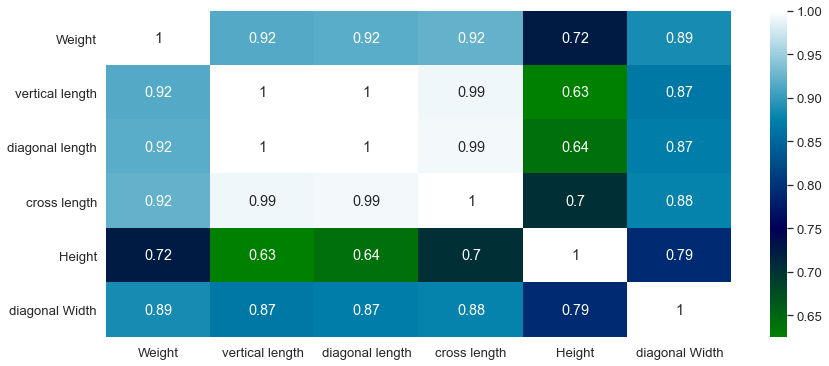

In [62]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

# Make Clustering with KMeans 

In [57]:
df_copy = df[['Weight', 'Height']]

In [58]:
df_copy

,Weight,Height
0,242.0,11.5200
1,290.0,12.4800
2,340.0,12.3778
3,363.0,12.7300
4,430.0,12.4440
...,...,...
154,12.2,2.0904
155,13.4,2.4300
156,12.2,2.2770
157,19.7,2.8728


### Scaling data

In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

### Elbow Method

In [64]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    scores.append(model.inertia_)
scores

[318.00000000000006,
 102.57340446513328,
 75.56325509161657,
 54.81067620418993,
 39.09857017874579,
 29.13776174021128,
 22.199763313244837,
 18.581322513294634,
 13.701196844574422,
 11.477349782382465]

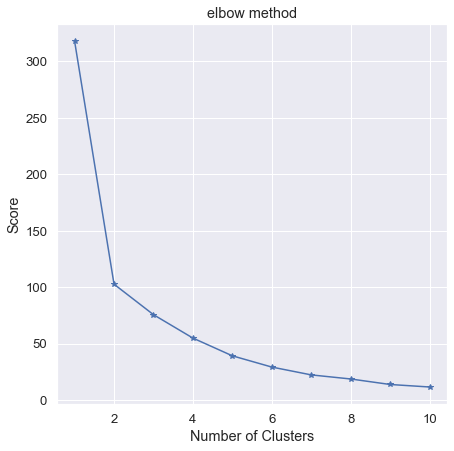

In [65]:
plt.plot(range(1,11), scores, '-*')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('elbow method')
plt.show()

In [66]:
model = KMeans(n_clusters=4)
model.fit(scaled_data)
cluster = model.predict(scaled_data)
cluster

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [67]:
centroid = model.cluster_centers_
centroid

array([[-0.24140509, -0.0375737 ],
       [ 0.77256005,  1.59013905],
       [-0.85419097, -0.94275541],
       [ 1.61292927,  0.5218916 ]])

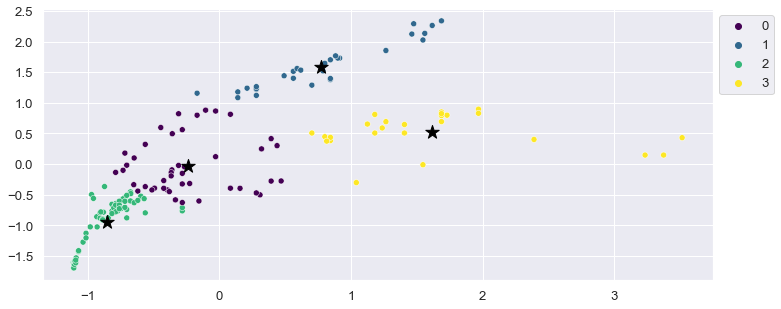

In [77]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1],s=200, marker='*', c='black')
plt.legend(bbox_to_anchor=(1,1), loc=(2))

In [80]:
df['cluster'] = cluster

In [95]:
df[df['cluster']==0]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900,0
40,Roach,281.5,19.0,20.5,22.8,6.4752,3.3516,0
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352,0
50,Roach,200.0,22.1,23.5,26.8,7.3968,4.1272,0
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060,0


In [96]:
df[df['cluster']==1]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,cluster
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274,1
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785,1
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438,1
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594,1
10,Bream,475.0,28.4,31.0,36.2,14.2628,5.1042,1
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146,1
12,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680,1
13,Bream,340.0,29.5,32.0,37.3,13.9129,5.0728,1
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708,1
15,Bream,600.0,29.4,32.0,37.2,15.4380,5.5800,1


In [97]:
df[df['cluster']==2]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,cluster
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680,2
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217,2
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044,2
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746,2
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742,2
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,2
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,2
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,2


In [98]:
df[df['cluster']==3]

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,cluster
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736,3
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250,3
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957,3
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640,3
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408,3
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646,3
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666,3
116,Perch,900.0,36.5,39.0,41.4,11.1366,7.4934,3
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030,3
118,Perch,820.0,36.6,39.0,41.3,12.4313,7.3514,3


In [99]:
df

,Species,Weight,vertical length,diagonal length,cross length,Height,diagonal Width,cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,2
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,2
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,2


### Agglomerative Clustering (Hierarchical)

In [100]:
model = AgglomerativeClustering(n_clusters=4)
cluster = model.fit_predict(scaled_data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:>

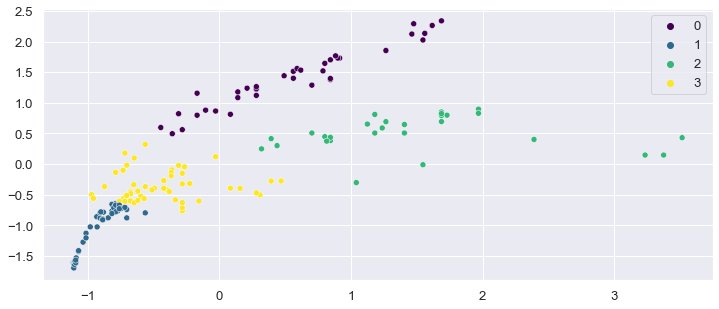

In [101]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')